## Basic Information (Brain Lower Grade Glioma) 

In [1]:
import numpy as np 
import pandas as pd 
import scanpy as sc 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sc.settings.verbosity = 3 

sc.settings.set_figure_params(dpi = 80)
%matplotlib inline

## Gene Data

In [2]:
# read the gene expression data: 
raw_data_rna = pd.read_table("../data/data_mrna_seq_v2_rsem.txt", sep="\t")
raw_data_rna.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,8.7141,36.4493,11.8131,8.6116,0.000,5.3382,3.7845,8.3071,...,19.1299,12.5770,10.9796,7.8225,3.3371,5.4526,8.2616,11.5121,5.3895,9.9433
2,UBE2Q2P2,100134869,22.7523,21.1767,11.0242,5.0835,30.261,27.8886,8.7230,15.4466,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
3,HMGB1P1,10357,268.5760,156.6870,185.1380,269.8360,216.341,159.7590,198.1880,208.5410,...,127.7470,106.8290,205.5170,184.4080,125.5470,124.9190,133.7390,120.9240,107.2540,143.0060
4,NaN,10431,845.8150,390.2690,621.4530,835.7290,812.508,576.9050,551.9470,607.8960,...,564.3620,603.3720,570.9130,760.7160,875.1410,658.2210,662.6510,524.7240,705.1280,748.5820


In [3]:
# choosing Entrez_Gene_Id as column because: 
print(f"There are {len(raw_data_rna[raw_data_rna.Entrez_Gene_Id.isna()])} genes has no ids")
print("we would use Entrez_Gene_Id as name of gene with a correponding dictionary table")
gene_symbol_id = raw_data_rna.iloc[:,:2].copy()
gene_symbol_id.tail()

There are 0 genes has no ids
we would use Entrez_Gene_Id as name of gene with a correponding dictionary table


,Hugo_Symbol,Entrez_Gene_Id
20526,ZYG11A,440590
20527,ZYG11B,79699
20528,ZYX,7791
20529,ZZEF1,23140
20530,ZZZ3,26009


In [4]:
# 
gene_symbol_id[gene_symbol_id.Entrez_Gene_Id == 3122]

,Hugo_Symbol,Entrez_Gene_Id
7912,HLA-DRA,3122


In [5]:
# transpose the data and make the gene id as the column names: 
df_clean = raw_data_rna.set_index("Entrez_Gene_Id").drop("Hugo_Symbol", axis = 1).transpose()
print(f"There are {len(df_clean)} samples in total, and there are {len(df_clean.columns)} genes in total.")
df_clean.head()

There are 514 samples in total, and there are 20531 genes in total.


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-CS-4938-01,0.0,8.7141,22.7523,268.576,845.815,0.0,182.505,0.4196,0.0,0.0,...,80.1636,50.3461,64.1913,523.180,1311.52,0.0000,1495.70,1598.91,1171.810,836.165
TCGA-CS-4941-01,0.0,36.4493,21.1767,156.687,390.269,0.0,325.052,1.7253,0.0,0.0,...,187.2980,110.4210,105.9350,467.564,1226.71,0.3451,1751.21,3889.92,1707.730,1015.530
TCGA-CS-4942-01,0.0,11.8131,11.0242,185.138,621.453,0.0,131.142,0.0000,0.0,0.0,...,120.0310,186.5050,115.2250,454.325,1102.42,0.3460,1586.16,2214.53,1423.880,706.920
TCGA-CS-4943-01,0.0,8.6116,5.0835,269.836,835.729,0.0,83.475,0.3261,0.0,0.0,...,667.4480,1183.6500,89.0183,491.068,1288.32,3.2607,1760.15,2131.55,1916.990,689.321
TCGA-CS-4944-01,0.0,0.0000,30.2610,216.341,812.508,0.0,80.696,0.0000,0.0,0.0,...,57.3244,56.4872,42.3654,323.793,1012.73,0.5044,1225.07,1692.60,729.794,456.941


In [6]:
# check the quality of the data: 
# 1) if there is any NA data
print(f"If there is NA values: {df_clean.isnull().values.any()}")

# 2) if there are columns with all the same value
unique_counts = df_clean.nunique()
same_value_cols = unique_counts[unique_counts == 1].index.tolist()
print(f"There are {len(same_value_cols)} columns with the same value.")
print(f"{same_value_cols[0:10]}...")

If there is NA values: False
There are 307 columns with the same value.
[136542, 317712, 728045, 728036, 255313, 728096, 728062, 653282, 728042, 57135]...


In [7]:
# thus, we need to drop all of same_value_cols: 
df_clean_1 = df_clean.drop(same_value_cols, axis = 1)
df_clean_1.head()

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,155060,26823,280660,340602,388795,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-CS-4938-01,0.0,8.7141,22.7523,268.576,845.815,182.505,0.4196,0.0,2.0978,0.4196,...,80.1636,50.3461,64.1913,523.180,1311.52,0.0000,1495.70,1598.91,1171.810,836.165
TCGA-CS-4941-01,0.0,36.4493,21.1767,156.687,390.269,325.052,1.7253,0.0,3.4507,0.3451,...,187.2980,110.4210,105.9350,467.564,1226.71,0.3451,1751.21,3889.92,1707.730,1015.530
TCGA-CS-4942-01,0.0,11.8131,11.0242,185.138,621.453,131.142,0.0000,0.0,1.7301,0.3460,...,120.0310,186.5050,115.2250,454.325,1102.42,0.3460,1586.16,2214.53,1423.880,706.920
TCGA-CS-4943-01,0.0,8.6116,5.0835,269.836,835.729,83.475,0.3261,0.0,1.3043,0.0000,...,667.4480,1183.6500,89.0183,491.068,1288.32,3.2607,1760.15,2131.55,1916.990,689.321
TCGA-CS-4944-01,0.0,0.0000,30.2610,216.341,812.508,80.696,0.0000,0.0,3.0261,0.0000,...,57.3244,56.4872,42.3654,323.793,1012.73,0.5044,1225.07,1692.60,729.794,456.941


In [8]:
## read patient data and preprocessing...
raw_data_sample = pd.read_table("../data/data_clinical_sample.txt", sep="\t")
df_sample2 = pd.read_table("../supplement_data/Clinical_Data.tsv", sep="\t")
raw_data_sample.columns = raw_data_sample.iloc[3,:]
raw_data_sample = raw_data_sample.drop([0,1,2,3], axis = 0)
df_patient = raw_data_sample.reset_index().drop(["index"], axis = 1)
df_full = df_patient.merge(df_sample2, left_on = "PATIENT_ID", right_on = "Patient ID", how = "left")
df_full_1 = df_full.drop(['Patient ID', 'Sample ID','Cancer Type Detailed','Tumor Type', 'Aneuploidy Score'], axis = 1)

df_sample_with_gene = df_clean_1.merge(df_full_1, left_index=True, right_on = "SAMPLE_ID")
X = df_sample_with_gene.iloc[:,0:-30].copy()
X = X.set_index("PATIENT_ID")
obs = df_sample_with_gene.iloc[:,-31:].copy()
obs = obs.set_index("PATIENT_ID")
adata_sample = sc.AnnData(X, obs = obs)

## Non-negative matrix factorization 

In [26]:
df_gene = df_clean_1.transpose()
adata_gene = sc.AnnData(df_gene)
X = adata_gene.X
from sklearn.decomposition import NMF
ranks = [5,10,15,20,25,30,35,40,45,50]
Ws = []
Hs = []
Errors = []
for r in ranks:
    model = NMF(n_components=r, init='random', random_state=0)
    Ws.append(model.fit_transform(X))
    Hs.append(model.components_)
    Errors.append(model.reconstruction_err_)

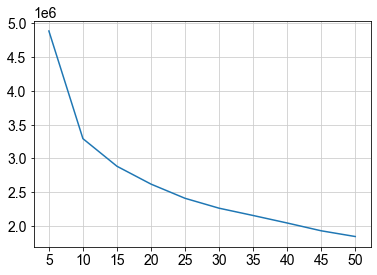

In [27]:
import matplotlib.pyplot as plt
plt.plot(Errors)
plt.xticks(ticks = range(0,len(ranks)),labels= ranks)
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

def random_forest_model_NMF_comparison(k):
    X= pd.DataFrame(Hs[k].T)
    X.index = adata_sample.obs.index
    y = adata_sample.obs['Subtype']
    df = pd.concat([X,y], axis = 1)
    df_drop = df.drop(df[df.Subtype.isnull()].index, axis = 0)
    # assign features, target and encoding...
    y = df_drop["Subtype"]
    X= df_drop.drop("Subtype", axis = 1)

    y = y.map({"LGG_IDHmut-non-codel":0, "LGG_IDHwt":1, "LGG_IDHmut-codel":2})

    X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

    # using random forest classifier as the predicting model: 
    rf = RandomForestClassifier(warm_start = True, n_estimators = 100)
    #rf.fit(X_train,y_train)
    #print(f"The training set accuracy score: {rf.score(X_train,y_train)}")
    #print(f"The test set accuracy score: {rf.score(X_test,y_test)}")
    cvs = np.mean(cross_val_score(rf, X, y, cv=5))
    #print(f"The cross validation score of this model is {cvs}")
    return cvs

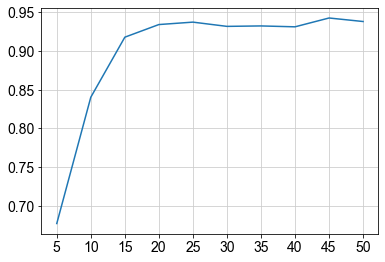

In [103]:
# simulate for 100 time for each to have stable cross validation scores: 
cv_scores = []
for k in range(len(ranks)):
    simulations = []
    for e in range(100):
        simulations.append(random_forest_model_NMF_comparison(k))
    cv_scores.append(np.mean(simulations))

plt.plot(cv_scores)
plt.xticks(ticks = range(0,len(ranks)),labels= ranks)
plt.show()

## Choosing rank=20:

In [104]:
X= pd.DataFrame(Hs[3].T)
X.index = adata_sample.obs.index
y = adata_sample.obs['Subtype']
df = pd.concat([X,y], axis = 1)
df_drop = df.drop(df[df.Subtype.isnull()].index, axis = 0)
# assign features, target and encoding...
y = df_drop["Subtype"]
X= df_drop.drop("Subtype", axis = 1)

y = y.map({"LGG_IDHmut-non-codel":0, "LGG_IDHwt":1, "LGG_IDHmut-codel":2})

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

# using random forest classifier as the predicting model: 
rf = RandomForestClassifier(warm_start = True, n_estimators = 100)
rf.fit(X_train,y_train)
print(f"The training set accuracy score: {rf.score(X_train,y_train)}")
print(f"The test set accuracy score: {rf.score(X_test,y_test)}")
cvs = np.mean(cross_val_score(rf, X, y, cv=5))

The training set accuracy score: 1.0
The test set accuracy score: 0.9763779527559056


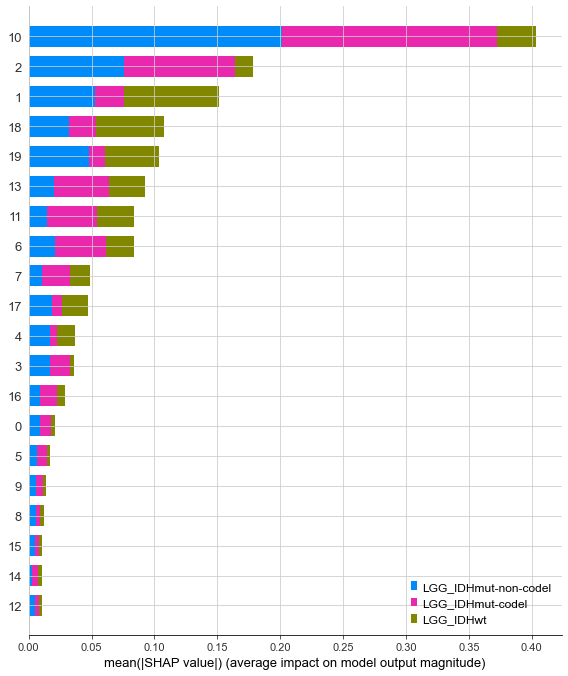

In [105]:
# feature importance inspection 
import shap 
explainer = shap.TreeExplainer(rf)
shap_valuesfor = explainer.shap_values(X)

class_names = ["LGG_IDHmut-non-codel", "LGG_IDHwt", "LGG_IDHmut-codel"]
shap.summary_plot(shap_valuesfor, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns)

Text(0.5, 1.0, 'metagroup 10: top 50 genes')

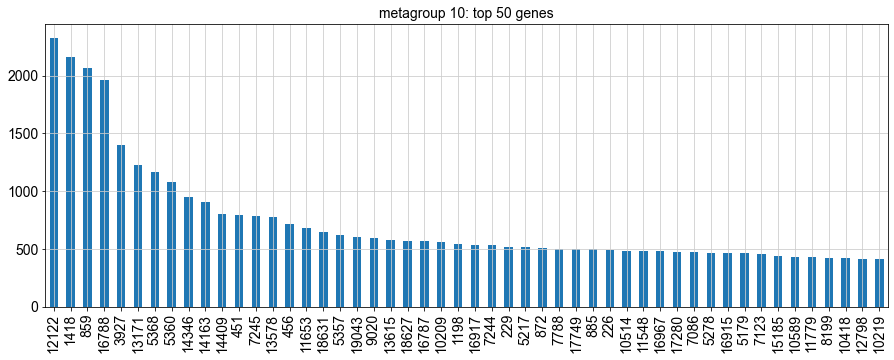

In [109]:
W = Ws[3]
len(W.T[10])
import matplotlib.pyplot as plt 
gene_name = adata_sample.var_names
meta_10 = W.T[10]

meta_gene10= pd.DataFrame({"gene_name":gene_name, "meta_10":meta_10}).sort_values("meta_10", ascending = False)

plt.subplots(figsize = (15,5))
meta_gene10.iloc[0:50,:].meta_10.plot.bar()
plt.title("metagroup 10: top 50 genes")

Text(0.5, 1.0, 'metagroup 2: top 50 genes')

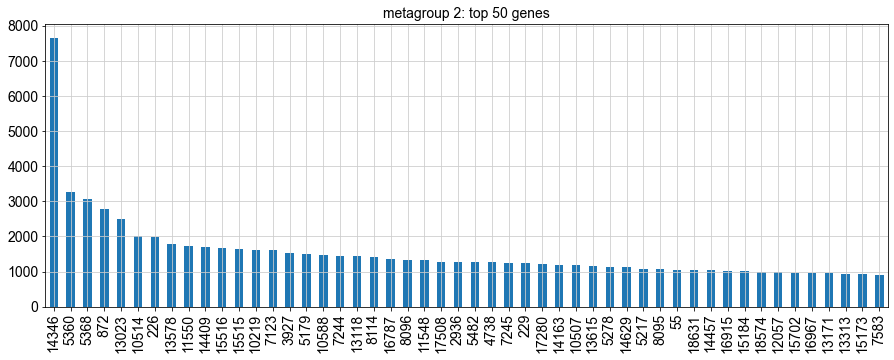

In [110]:
W = Ws[3]
len(W.T[10])
import matplotlib.pyplot as plt 
gene_name = adata_sample.var_names
meta_2 = W.T[2]

meta_gene2= pd.DataFrame({"gene_name":gene_name, "meta_2":meta_2}).sort_values("meta_2", ascending = False)

plt.subplots(figsize = (15,5))
meta_gene2.iloc[0:50,:].meta_2.plot.bar()
plt.title("metagroup 2: top 50 genes")

In [19]:
import requests
r = requests.get("https://clinicaltables.nlm.nih.gov/api/ncbi_genes/v3/search?terms=TP53")